# 2021 Car Crashes by Zip Code Areas - Boston

## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon

## Data wrangling and selecting the area of interest

In [2]:
sf_path = "/Users/judyfung/Documents/Python Learning/GeoPandasProject/MACarCrashes2021/Data/SHP/MAtownssurvey_shp/TOWNSSURVEY_POLY.shp"
sf = gpd.read_file(sf_path, encoding='utf-8')
bos_sf = sf[sf.TOWN == 'BOSTON']
bos_shape = bos_sf.to_crs('epsg:4326')
bos_shape

,TOWN,TOWN_ID,POP1980,POP1990,POP2000,POPCH90_00,TYPE,ISLAND,COASTAL_PO,FOURCOLOR,...,FIPS_MCD,FIPS_COUNT,ACRES,SQUARE_MIL,POP2010,POPCH00_10,POPCH80_90,SHAPE_Leng,SHAPE_Area,geometry
229,BOSTON,35,570719,574283,588957,14674,C,0,NO,1,...,25025440,25,217.700000,0.340000,617594,28637,3564,5430.029078,8.809978e+05,"POLYGON ((-70.95597 42.34391, -70.95597 42.343..."
235,BOSTON,35,570719,574283,588957,14674,C,1,NO,1,...,25025440,25,2.822000,0.004000,617594,28637,3564,796.954688,1.142009e+04,"POLYGON ((-70.94382 42.33116, -70.94382 42.331..."
317,BOSTON,35,570719,574283,588957,14674,C,1,NO,1,...,25025440,25,1.747000,0.003000,617594,28637,3564,641.236403,7.070270e+03,"POLYGON ((-71.07978 42.26951, -71.07963 42.269..."
392,BOSTON,35,570719,574283,588957,14674,C,0,NO,1,...,25025440,25,241.674000,0.378000,617594,28637,3564,7442.970261,9.780188e+05,"POLYGON ((-71.00925 42.30550, -71.00991 42.305..."
395,BOSTON,35,570719,574283,588957,14674,C,1,NO,1,...,25025440,25,25.865000,0.040000,617594,28637,3564,2132.312333,1.046713e+05,"POLYGON ((-70.95340 42.31291, -70.95334 42.312..."
512,BOSTON,35,570719,574283,588957,14674,C,1,NO,1,...,25025440,25,250.990000,0.392000,617594,28637,3564,7160.027832,1.015719e+06,"POLYGON ((-70.95817 42.32711, -70.95847 42.327..."
514,BOSTON,35,570719,574283,588957,14674,C,1,NO,1,...,25025440,25,69.348000,0.108000,617594,28637,3564,2822.859019,2.806428e+05,"POLYGON ((-70.92755 42.33107, -70.92753 42.331..."
677,BOSTON,35,570719,574283,588957,14674,C,1,NO,1,...,25025440,25,9.709000,0.015000,617594,28637,3564,2088.150627,3.929173e+04,"POLYGON ((-71.08400 42.35426, -71.08387 42.354..."
771,BOSTON,35,570719,574283,588957,14674,C,0,NO,1,...,25025440,25,2.738000,0.004000,617594,28637,3564,486.763608,1.108146e+04,"POLYGON ((-71.06825 42.36859, -71.06832 42.368..."
775,BOSTON,35,570719,574283,588957,14674,C,0,NO,1,...,25025440,25,841.450000,1.315000,617594,28637,3564,16210.196820,3.405229e+06,"POLYGON ((-71.07425 42.39050, -71.07420 42.390..."


## Plotting roads

In [31]:
road_path = "/Users/judyfung/Documents/Python Learning/GeoPandasProject/MACarCrashes2021/Data/SHP/MassDOT_Roads_SHP/EOTROADS_ARC.shp"
roads = gpd.read_file(road_path)
roads = roads.to_crs('epsg:4326')
roads = gpd.sjoin(roads, bos_shape, op="intersects")
roads.shape

(16683, 94)

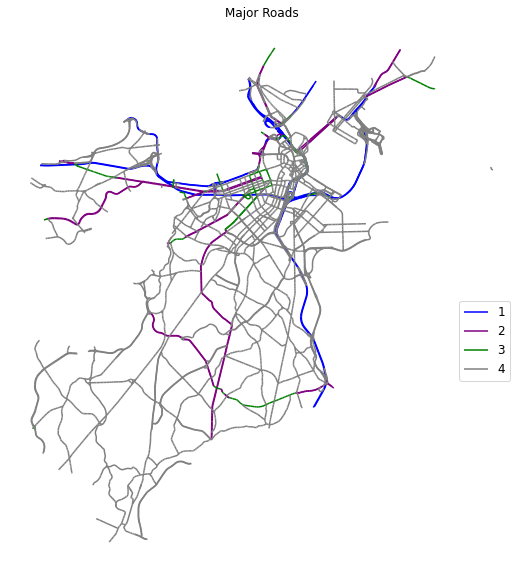

In [41]:
#Group roads into four categories: 1)Limited Access Highway, 2)Multi-lane Highway, 3)Other numbered route, 4)Major Road - arterials and collectors
main_roads = roads[(roads.CLASS == 1) | (roads.CLASS == 2) | (roads.CLASS == 3) | (roads.CLASS == 4)]

# Create a dictionary and assign each attribute value to a particular color
roadPalette = { 1: 'blue',
                2: 'purple',
                3: 'green',
                4: 'grey'}
roadPalette
{1: 'blue', 2: 'purple', 3: 'green', 4: 'grey'}


# Plot data
fig, ax = plt.subplots(figsize=(10, 10))

# Loop through each attribute type and plot it using the colors assigned in the dictionary
for ctype, data in main_roads.groupby('CLASS'):
    
    # Define the color for each group using the dictionary
    color = roadPalette[ctype]
    
    # Plot each group using the color defined above
    data.plot(color=color,
              ax=ax,
              label=ctype)

ax.legend(bbox_to_anchor=(1.0, .5), prop={'size': 12})
ax.set(title='Major Roads')

ax.set_axis_off()
plt.show()

## Geocode car crashes data

In [33]:
car_crashes_path = "/Users/judyfung/Documents/Python Learning/GeoPandasProject/MACarCrashes2021/Data/XLS/2021_Vehicle_Level_Crash_Details_Boston_EditedV2.csv"
car_crashes = gpd.read_file(car_crashes_path)
df = pd.read_csv(car_crashes_path)
car_crash_gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.LON, df.LAT))
car_crash_gdf = car_crash_gdf.set_crs(('epsg:4326'), allow_override=True)

#Set a variable for spatial join with zipcode area
right = car_crash_gdf

## Prepare zipcode area

In [34]:
zipcode_area_bos_path = "/Users/judyfung/Documents/Python Learning/GeoPandasProject/MACarCrashes2021/Data/SHP/Zipcode_Areas_Boston.shp"
zipcode_area_bos = gpd.read_file(zipcode_area_bos_path)
zipcode_area_bos = zipcode_area_bos.to_crs('epsg:4326')

#Set a variable for spatial join for car crashes points
left = zipcode_area_bos

## Spatial Join

In [35]:
sjoined_crashes = gpd.sjoin(left, right, how='left', op='intersects')
sjoined_crashes.head()

,POSTCODE,PC_NAME,PC_TYPE,PA_NAME,PA_FIPS,CITY_TOWN,COUNTY,AREA_SQMI,SHAPE_AREA,SHAPE_LEN,...,IS_GEOCODED,GEOCODING_METHOD_NAME,X,Y,YEAR,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,02127,SOUTH BOSTON,NON UNIQUE,SOUTH BOSTON,63200,BOSTON,SUFFOLK,2.562158,6.635959e+06,29422.721276,...,Yes,Off Intersection,238307.7811,897755.4373,2021-0H6-000016,NaN,NaN,NaN,NaN,NaN
0,02127,SOUTH BOSTON,NON UNIQUE,SOUTH BOSTON,63200,BOSTON,SUFFOLK,2.562158,6.635959e+06,29422.721276,...,Yes,Off Intersection,238307.7811,897755.4373,2021-0H6-000016,NaN,NaN,NaN,NaN,NaN
0,02127,SOUTH BOSTON,NON UNIQUE,SOUTH BOSTON,63200,BOSTON,SUFFOLK,2.562158,6.635959e+06,29422.721276,...,Yes,Operator Designated,239146.6600,898168.8344,2021-0H6-003530,NaN,NaN,NaN,NaN,NaN
0,02127,SOUTH BOSTON,NON UNIQUE,SOUTH BOSTON,63200,BOSTON,SUFFOLK,2.562158,6.635959e+06,29422.721276,...,Yes,Operator Designated,239146.6600,898168.8344,2021-0H6-003530,NaN,NaN,NaN,NaN,NaN
0,02127,SOUTH BOSTON,NON UNIQUE,SOUTH BOSTON,63200,BOSTON,SUFFOLK,2.562158,6.635959e+06,29422.721276,...,"""One-way","not divided""",239261.1400,898190.5891,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
sjoined_crashes = sjoined_crashes.rename(columns={'index_right': 'crashes'})
sjoined_crashes['crashes'] = sjoined_crashes['crashes'].apply(lambda x: 0 if x== 0 else 1)
sjoined_crashes.crashes.value_counts()

1    2912
0       1
Name: crashes, dtype: int64

In [37]:
sjoined_crashes = sjoined_crashes.groupby('POSTCODE', as_index='False').agg({'crashes': 'sum', 'geometry': 'first'})
sjoined_crashes = gpd.GeoDataFrame(sjoined_crashes, crs='epsg:4326')
sjoined_crashes.shape

(40, 2)

## Plotting

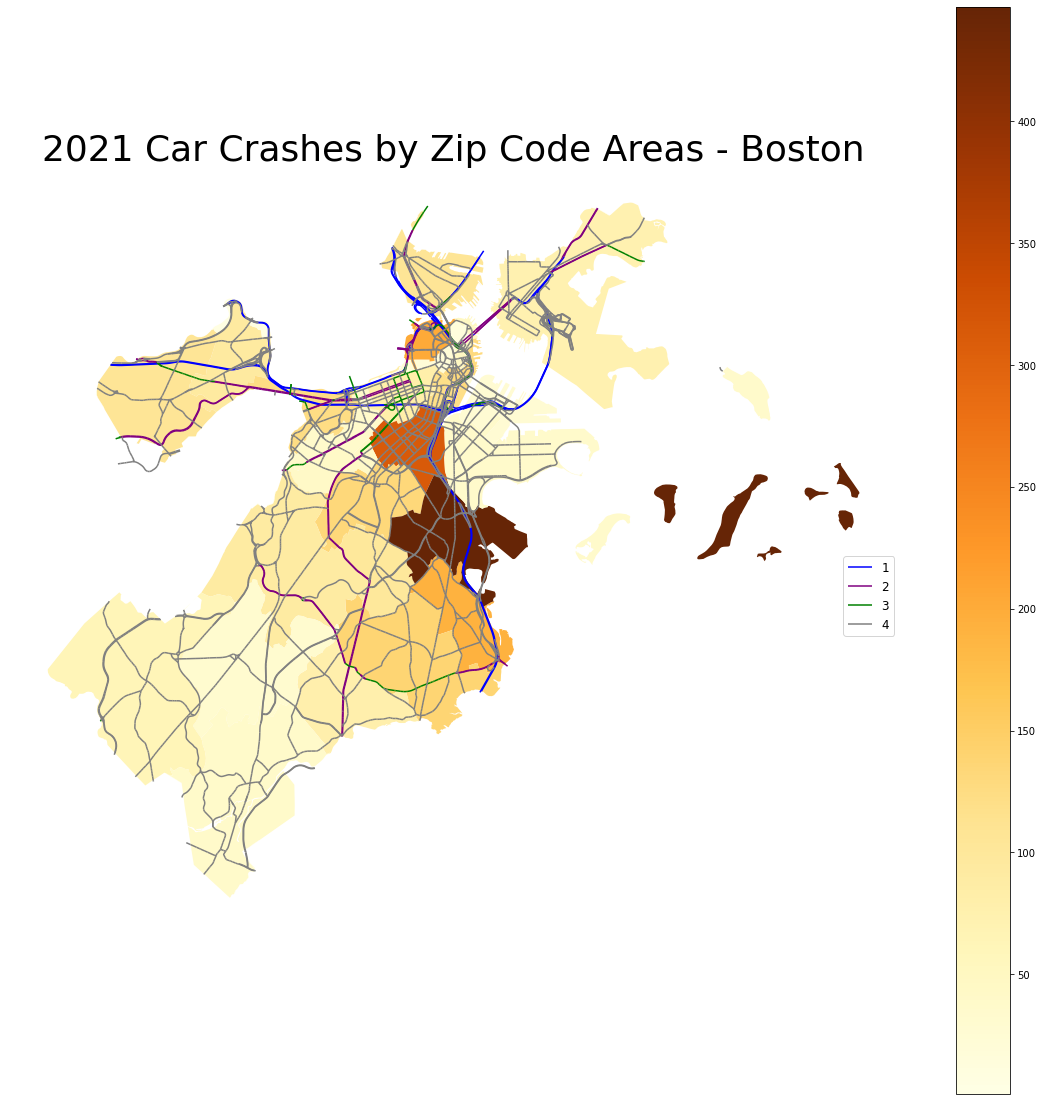

In [50]:
ax = sjoined_crashes.plot(figsize=(20,20), column='crashes', cmap='YlOrBr', k=5, legend=True)

# Loop through each attribute type and plot it using the colors assigned in the dictionary
for ctype, data in main_roads.groupby('CLASS'):
    
    # Define the color for each group using the dictionary
    color = roadPalette[ctype]
    
    # Plot each group using the color defined above
    data.plot(color=color,
              ax=ax,
              label=ctype)

ax.legend(bbox_to_anchor=(1.0, .5), prop={'size': 12})
ax.set_title("2021 Car Crashes by Zip Code Areas - Boston", fontsize=36)
ax.set_axis_off()